In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

import time

In [2]:
num_classifiers = 5
best_accuracy = np.zeros(num_classifiers)
train_time = np.zeros(num_classifiers)
test_time = np.zeros(num_classifiers)

cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']
print(target.value_counts())

4    1210
3     384
2      69
1      65
Name: class, dtype: int64


In [4]:
cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

In [6]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1296
1296
432
432


In [7]:
target.value_counts()

4    1210
3     384
2      69
1      65
Name: class, dtype: int64

In [8]:
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [9]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)
nn.fit(X_train_std,Y_train)
print(nn.score(X_train_std,Y_train))
y_pred=nn.predict(X_test_std)
print('Misclassified samples using Perceptron are: %d' %(Y_test!=y_pred).sum())
print('Classification Accuracy of Perceptron is %.2f ' %accuracy_score(Y_test,y_pred))

0.9344135802469136
Misclassified samples using Perceptron are: 48
Classification Accuracy of Perceptron is 0.89 


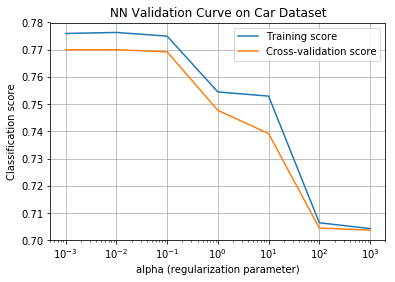

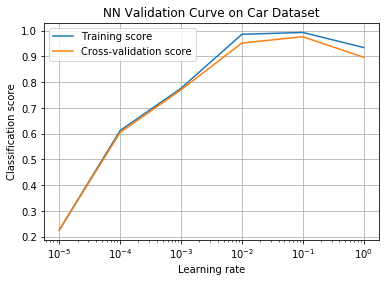

/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.

/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.

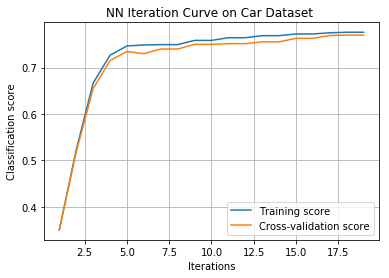

In [10]:

# Regularization parameter
alpha_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(nn, X_train_std, Y_train, param_name="alpha", param_range=alpha_range, cv=5,
                                            n_jobs=4)

plt.figure()
plt.semilogx(alpha_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('NN Validation Curve on Car Dataset')
plt.xlabel('alpha (regularization parameter)')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()

# Learning rate
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(nn, X_train_std, Y_train, param_name="learning_rate_init", param_range=lr_range, 
                                             cv=5, n_jobs=4)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('NN Validation Curve on Car Dataset')
plt.xlabel('Learning rate')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_2.png')
plt.show()


#iterations
iter_range = np.arange(1,20, 1)
train_scores, test_scores = validation_curve(nn, X_train_std, Y_train, param_name="max_iter", param_range=iter_range, 
                                             cv=5, n_jobs=4)

plt.figure()
plt.plot(iter_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(iter_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('NN Iteration Curve on Car Dataset ')
plt.xlabel('Iterations')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_2.png')
plt.show()

In [11]:
# Define grid for grid search after observing validation curves
alpha_range = np.logspace(-1, 2, 5)
lr_range = np.logspace(-5, 0, 6)
tuned_params = {'alpha' : alpha_range, 'learning_rate_init' : lr_range}
clf_nn = GridSearchCV(nn, param_grid=tuned_params, cv=5, n_jobs=4)
t0 = time.time()
clf_nn.fit(X_train_std, Y_train)
t1 = time.time()
train_time[1] = t1 - t0
print('Completed training in %f seconds' % train_time[1])
best_clf_nn = clf_nn
best_params = clf_nn.best_params_
print("Best parameters set found on development set:")
print(best_params)
t0 = time.time()
y_pred = clf_nn.predict(X_test)
t1 = time.time()
test_time[0] = t1 - t0
print('Inference time on test data: %f seconds' % test_time[0])
best_accuracy[0] = accuracy_score(Y_test, y_pred)
print('Accuracy of Neural Network is %.2f%%' % (best_accuracy[0] * 100))

Completed training in 5.824171 seconds
Best parameters set found on development set:
{'alpha': 0.1, 'learning_rate_init': 0.1}
Inference time on test data: 0.002867 seconds
Accuracy of Neural Network is 96.53%


In [12]:
print(confusion_matrix(Y_test, y_pred))

[[ 17   2   1   0]
 [  0  15   0   0]
 [  3   5  91   4]
 [  0   0   0 294]]


/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/anaconda3/envs/mlclass/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWar

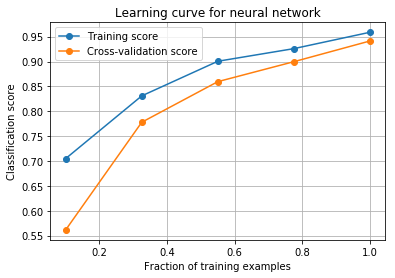

In [13]:

train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_nn, X_train, Y_train, train_sizes=train_sizes, cv=5, n_jobs=4)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for neural network')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()